In [14]:
#import opendatasets as od

#od.download('https://www.kaggle.com/datasets/averkij/tennessee-eastman-process-simulation-dataset')

In [15]:
import pyreadr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [16]:
# Only Training data is used

df_FaultFree = pyreadr.read_r(r'Dataset\\TEP_FaultFree_Training.RData')['fault_free_training']
df_Faulty = pyreadr.read_r(r'Dataset\\TEP_Faulty_Training.RData')['faulty_training']

In [ ]:
DF = pd.concat([df_FaultFree,df_Faulty]) # Join both fault free and faulty dataset
DF.head()

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.0,1.0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0.0,1.0,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0.0,1.0,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0.0,1.0,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0.0,1.0,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461


In [ ]:
# Calculate summary statistics for each column
summary = DF[DF['simulationRun']==1].iloc[:,3:].describe()
print(summary)

            xmeas_1       xmeas_2       xmeas_3       xmeas_4       xmeas_5  \
count  10500.000000  10500.000000  10500.000000  10500.000000  10500.000000   
mean       0.265576   3661.241419   4505.710048      9.348456     26.904955   
std        0.143596     41.840258    103.764946      0.299329      0.235383   
min       -0.003183   3470.900000   3884.300000      7.494400     25.592000   
25%        0.225830   3636.800000   4473.000000      9.269300     26.764000   
50%        0.251195   3661.250000   4506.700000      9.352200     26.897000   
75%        0.282177   3686.500000   4545.600000      9.442225     27.056000   
max        1.005200   3820.200000   5013.300000     11.157000     28.077000   

            xmeas_6       xmeas_7       xmeas_8       xmeas_9      xmeas_10  \
count  10500.000000  10500.000000  10500.000000  10500.000000  10500.000000   
mean      42.352988   2716.501076     74.965782    120.400574      0.346336   
std        0.290591     68.489751      1.200865    

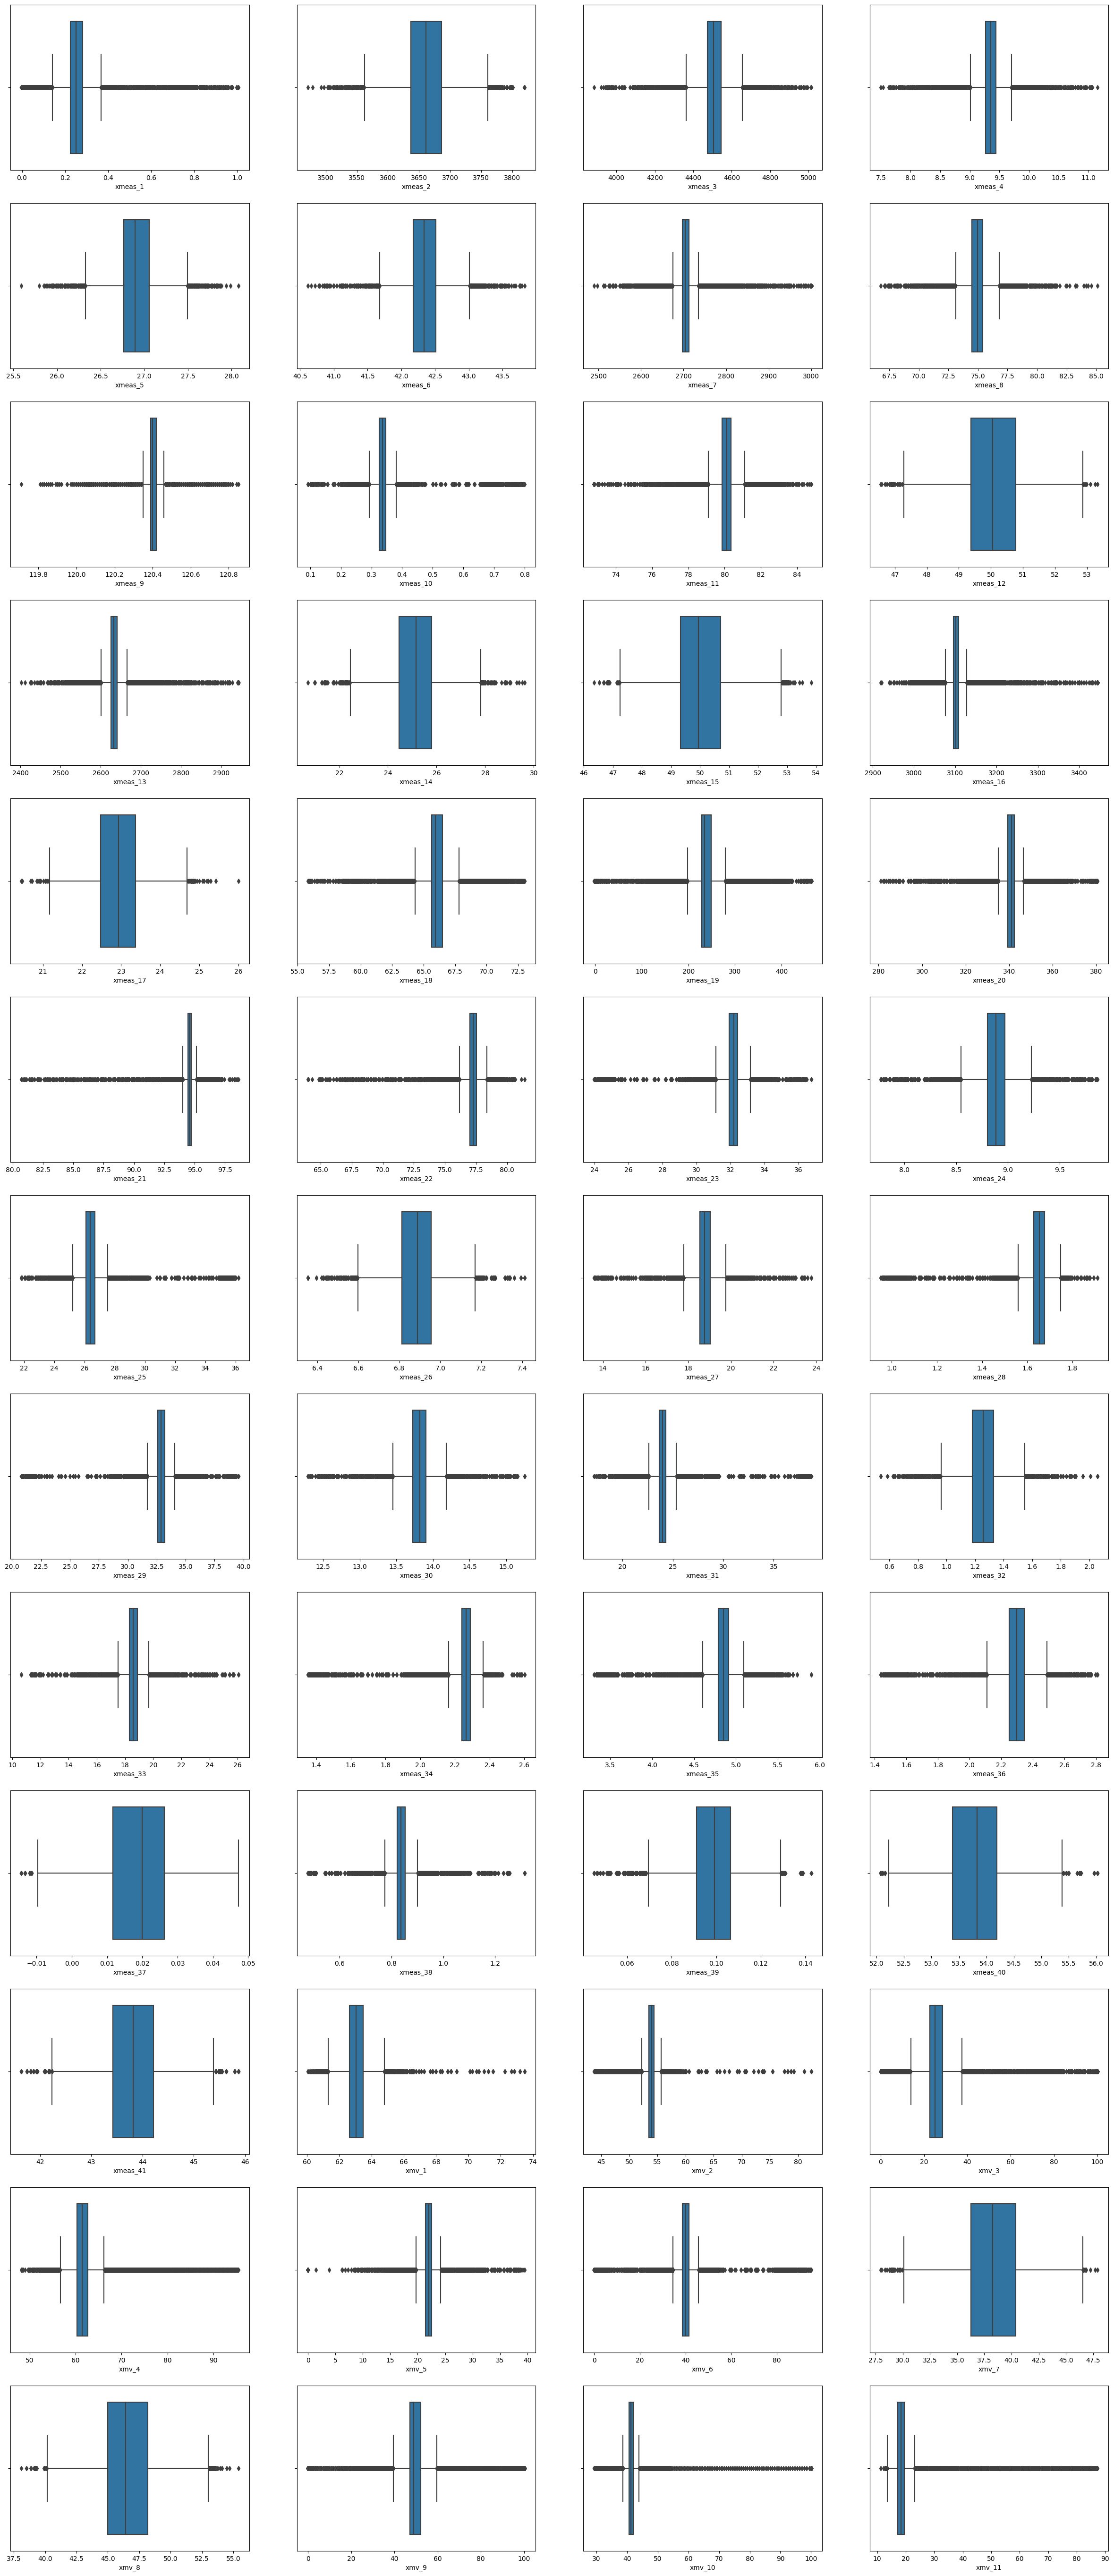

In [ ]:
# Create a box plot for each variable
data = DF[DF['simulationRun']==1]
    
fig, ax = plt.subplots(13,4,figsize=(30,70))

for i,column in enumerate(data.columns[3:]):   #select all the feature columns to plot
    sns.boxplot(data=data,x=column,ax=ax.ravel()[i])

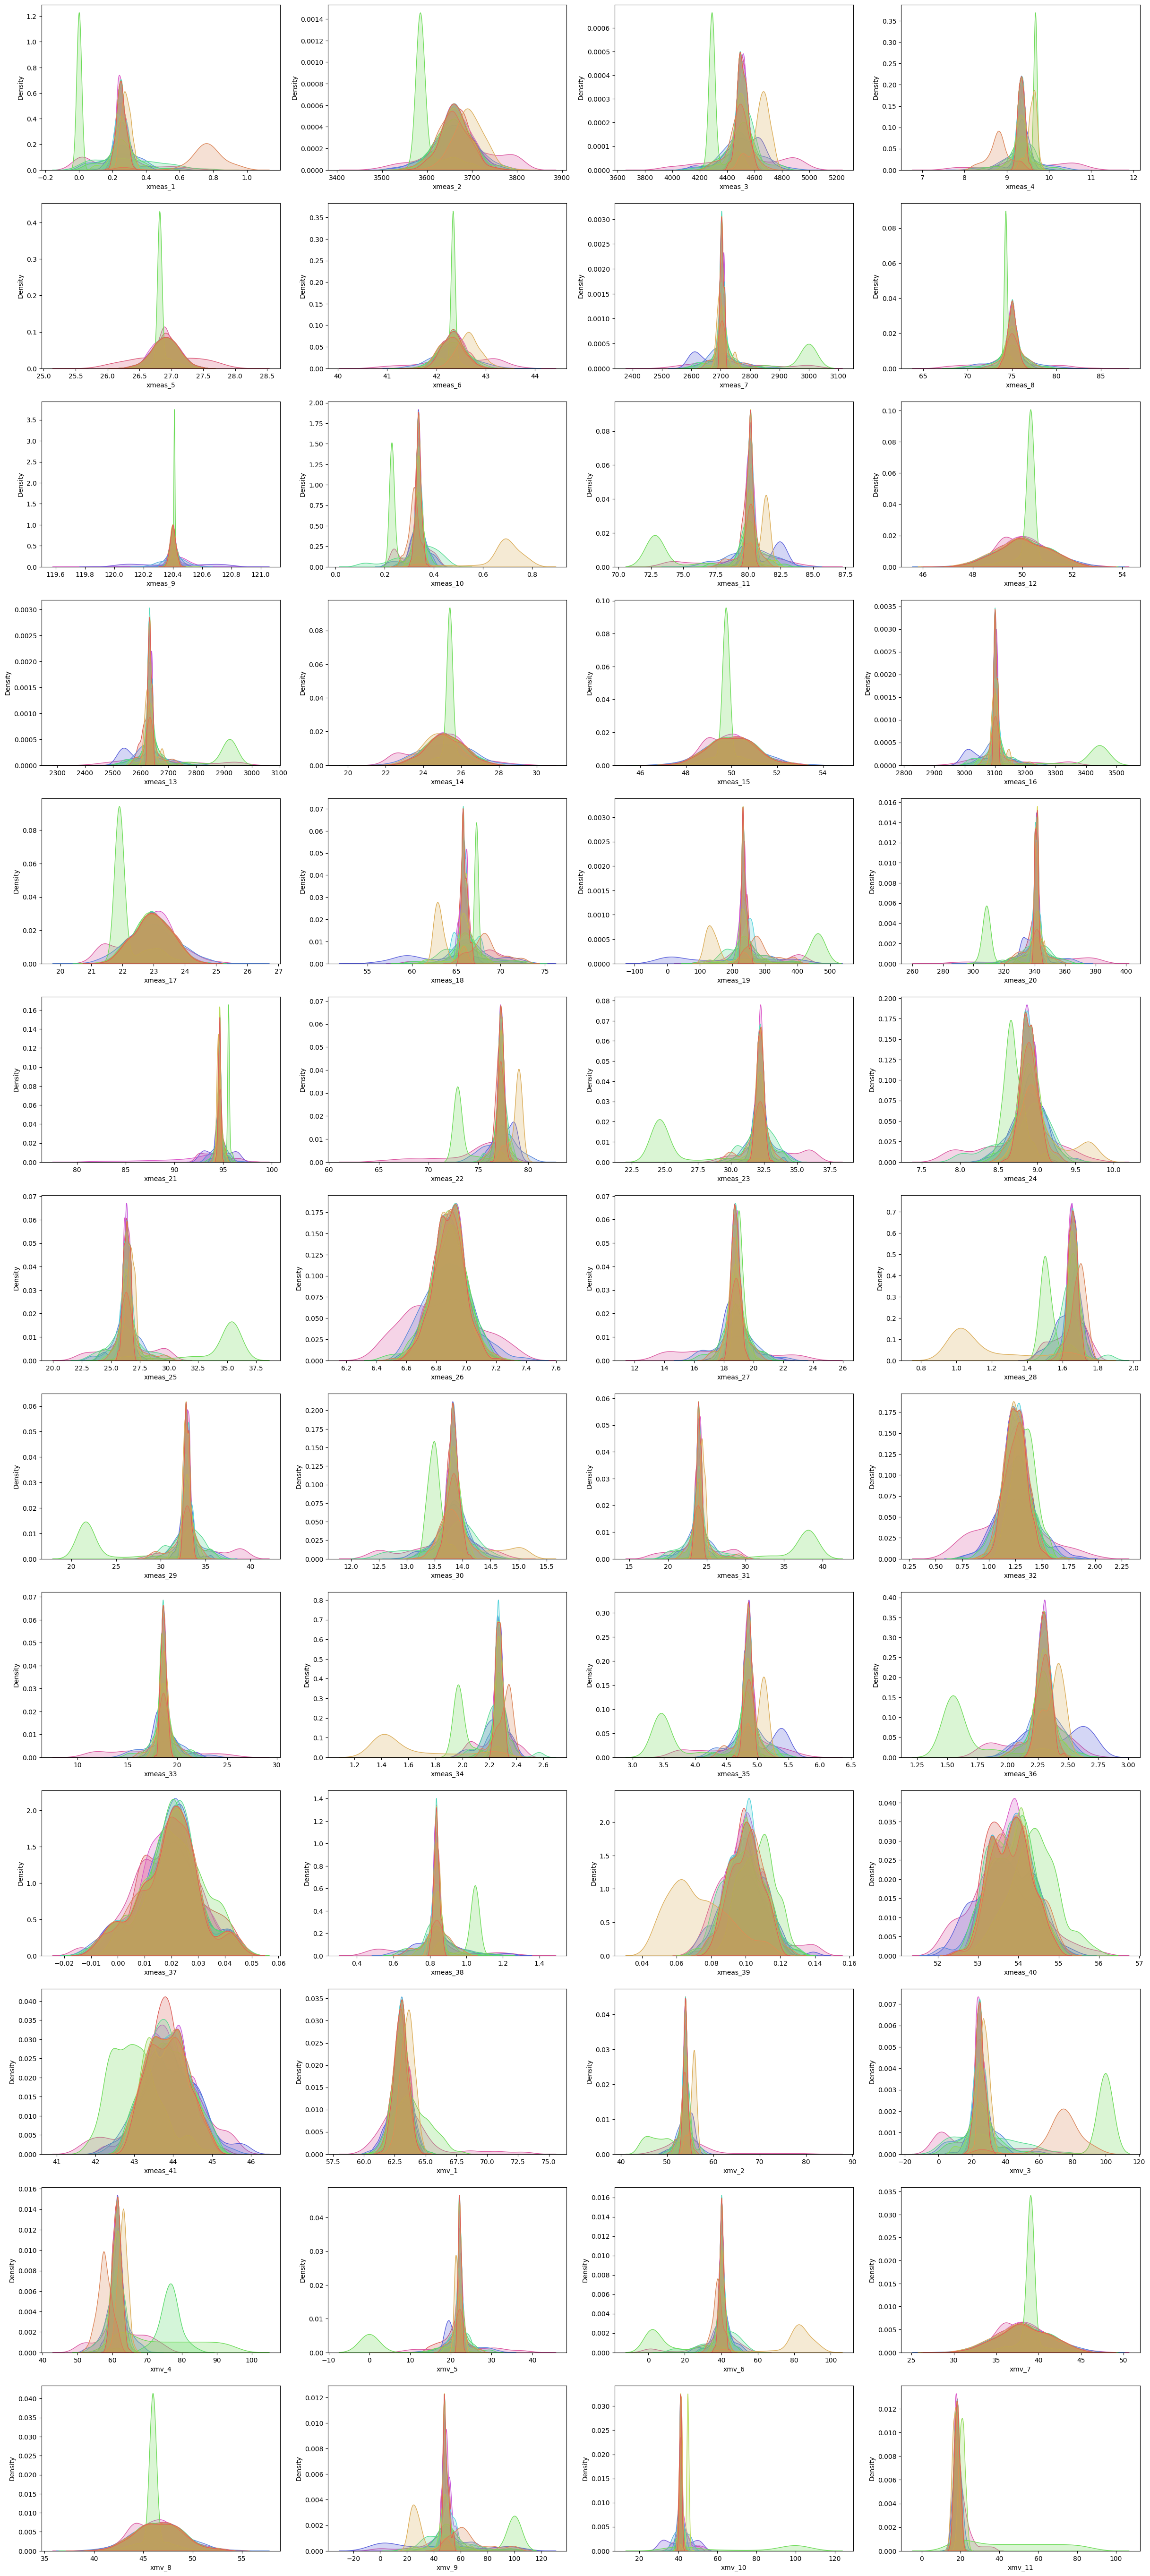

In [ ]:
# KDE plot for each variable
    
fig, ax = plt.subplots(13,4,figsize=(30,70))

for i,column in enumerate(data.columns[3:]):   #select all the feature columns to plot
    sns.kdeplot(data=data, x=column, hue="faultNumber",palette="hls",ax=ax.ravel()[i],fill=True, legend=False)

In [ ]:
# Load the data into a pandas DataFrame
data = DF[DF['simulationRun']==1].iloc[:,3:]

# Calculate the correlation matrix
corr = data.corr()

# Create a heatmap with annotations
sns.set(style='white')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(50, 50))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [ ]:
# Calculate the correlation matrix
corr_matrix = data.corr()

upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
print(len(to_drop)); print(to_drop)

In [ ]:
reduced_data = DF[(DF['simulationRun'] >1 ) & (DF['simulationRun'] <10 ) & (DF['sample']>20)]
# reduced_data = data.drop(columns=to_drop, axis=1)
reduced_data = reduced_data[reduced_data['faultNumber'] != 3]
reduced_data = reduced_data[reduced_data['faultNumber'] != 9]
reduced_data = reduced_data[reduced_data['faultNumber'] != 15]

reduced_data

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc = StandardScaler()

sc.fit(reduced_data.iloc[:,3:])


In [ ]:
X = sc.transform(reduced_data.iloc[:,3:])
Y = reduced_data['faultNumber']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_enc = le.fit_transform(Y)

In [ ]:
X = sc.transform(reduced_data.iloc[:,3:])
Y = reduced_data['faultNumber']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_enc = le.fit_transform(Y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y_enc, test_size=0.2, random_state=42)

In [ ]:
y_train.shape

In [ ]:
# Import the required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

# Create an instance of each algorithm
logreg = LogisticRegression(max_iter=10000)
svm = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
nb = GaussianNB()
knn = KNeighborsClassifier()
xg = xgb.XGBClassifier()

# Train the algorithms on the data
logreg.fit(x_train, y_train)
# svm.fit(x_train, y_train)
dt.fit(x_train, y_train)
rf.fit(x_train, y_train)
nb.fit(x_train, y_train)
knn.fit(x_train, y_train)
xg.fit(x_train, y_train)
 
# Use the trained models to make predictions on new data
y_pred_logreg =logreg.predict(x_test)
# y_pred_svm = svm.predict(x_test)
y_pred_dt = dt.predict(x_test)
y_pred_rf = rf.predict(x_test)
y_pred_nb = nb.predict(x_test)
y_pred_knn = knn.predict(x_test)
y_pred_xg = xg.predict(x_test)

In [ ]:
# Import the required libraries
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# Create a function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    f, ax = plt.subplots(figsize=(15, 15))
    cm = confusion_matrix(y_true, y_pred,normalize='true')
    sns.heatmap(cm, annot=True, cmap='Blues',ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_ylim(len(cm), 0)
    plt.tight_layout()
    plt.show()

# Plot the confusion matrix and print the f1 score for each algorithm
plot_confusion_matrix(y_test, y_pred_logreg, 'Logistic Regression Confusion Matrix')
print("Logistic Regression accuracy_score:", accuracy_score(y_test, y_pred_logreg))

# plot_confusion_matrix(y_test, y_pred_svm, 'SVM Confusion Matrix')
# print("SVM accuracy_score:", accuracy_score(y_test, y_pred_svm))

plot_confusion_matrix(y_test, y_pred_dt, 'Decision Tree Confusion Matrix')
print("Decision Tree accuracy_score:", accuracy_score(y_test, y_pred_dt))

plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest Confusion Matrix')
print("Random Forest accuracy_score:", accuracy_score(y_test, y_pred_rf))

plot_confusion_matrix(y_test, y_pred_nb, 'Naive Bayes Confusion Matrix')
print("Naive Bayes accuracy_score:", accuracy_score(y_test, y_pred_nb))

plot_confusion_matrix(y_test, y_pred_knn, 'KNN Confusion Matrix')
print("KNN accuracy_score:", accuracy_score(y_test, y_pred_knn))

plot_confusion_matrix(y_test, y_pred_xg, 'Xgb Confusion Matrix')
print("Xgb accuracy_score:", accuracy_score(y_test, y_pred_xg))